<a href="https://colab.research.google.com/github/itoshiyanazawa/cnn_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import keras
from tensorflow.keras.models import Model

# Step 1

1. Load the CIFAR-10 dataset (You can use libraries like TensorFlow/Keras or PyTorch to load
the dataset.)
2. Explore the dataset (e.g., visualize some images, check the class distribution).
3. Use proper transformation on your data if required.
4. Normalize the image data.
5. Split the data into training, validation and test sets.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Set a seed value
SEED = 42

# Set the seed for NumPy
np.random.seed(SEED)

# Set the seed for TensorFlow
tf.random.set_seed(SEED)

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Combine train and test data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 3. Function to split data equally
def split_data_equally(x, y, train_ratio=0.8):
    num_classes = 10
    indices = []
    for i in range(num_classes):
        idx = np.where(y == i)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * train_ratio)
        indices.append((idx[:split], idx[split:]))

    train_indices = np.concatenate([i[0] for i in indices])
    val_indices = np.concatenate([i[1] for i in indices])

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)

    return x[train_indices], y[train_indices], x[val_indices], y[val_indices]

# 4. Split the data
x_train, y_train, x_val, y_val = split_data_equally(x_all, y_all)

# 5. Verify class distribution
def count_classes(y):
    return np.bincount(y.flatten())

print("Train set class distribution:", count_classes(y_train))
print("Validation set class distribution:", count_classes(y_val))
print("Test set class distribution:", count_classes(y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train set class distribution: [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Validation set class distribution: [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Test set class distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [3]:
print('Image size of x_train: ', x_train.shape)
print('Image size of x_val: ', x_val.shape)
print('Image size of x_test: ', x_test.shape)

Image size of x_train:  (48000, 32, 32, 3)
Image size of x_val:  (12000, 32, 32, 3)
Image size of x_test:  (10000, 32, 32, 3)


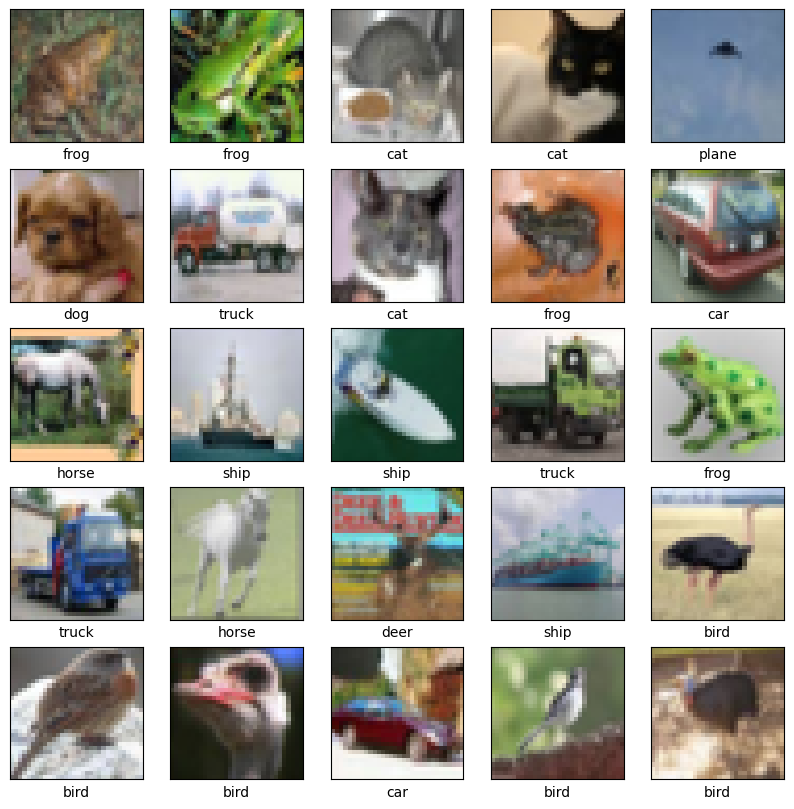

In [4]:
# Visualize images
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()



*   Do normalization before image transformation to keep image information secure



In [5]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0



*   Color is not important information in this case, object is important feature

*   Try color ones later to see improvement






In [6]:
# Transform into grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
x_val = tf.image.rgb_to_grayscale(x_val)

# Step 2
1. Define the CNN architecture (e.g., using Keras or PyTorch).
2. Explain what type of layers you are including and why (layers like Conv2D, MaxPooling2D,
Flatten, Dense, …)
3. Visualize your CNN architecture
4. Compile the model with appropriate loss function and optimizer. Explain your choice of loos
function and optimizer.
5. Train the model on the training data and validate it on the validation set.
6. Visualize the training process using both training and validation results.

In [7]:
# Define the CNN architecture
import keras
num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', name='last_conv'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_conv (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,722 (1.10 MB)

 Trainable params: 287,722 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

**Why this architecture**

*   conv2D: To devide data into small pieces (kernel?), repeating it to learn increasingly complex and abstract representations
  *   By increaing the number of filters, it makes CNN learn images in detail (hierarical structure?)
*   ReLu: helps CNN learn non-linear relationship between features and images
*   max_pooling: To capture the most important features on each kernel
*   global_average_pooling: Enforces correspondence between feature maps and categories
*   dropout: To avoid overfitting to the training dataset
*   dense: To learn combination of features from the previous layers
*   softmax: To give probabilities for each class to choose the biggest value as output




In [9]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Why these loss function and optimizer**


*   **SparseCategoricalCrossentropy**: This loss function is suitable for multi-class classification, like this 10 class clasification. It computes the cross-entropy loss between the true class labels and the predicted probabilities, ensuring that the model effectively learns to classify images into one of these distinct categories

*   **Adam**: This was chosen because of its adaptive learning rate capabilities, which make it effective for training CNN. Also, it requires less memory and high performance



In [10]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint('model_at_epoch_{epoch}.keras'),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2),
]

train_progress = model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
    callbacks = callbacks,
)

score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 440ms/step - accuracy: 0.2078 - loss: 2.0983 - val_accuracy: 0.4316 - val_loss: 1.5797
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 196s 427ms/step - accuracy: 0.4200 - loss: 1.6066 - val_accuracy: 0.5278 - val_loss: 1.3252
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 424ms/step - accuracy: 0.5093 - loss: 1.3903 - val_accuracy: 0.5916 - val_loss: 1.1615
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 418ms/step - accuracy: 0.5766 - loss: 1.2171 - val_accuracy: 0.6280 - val_loss: 1.0463
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 421ms/step - accuracy: 0.6219 - loss: 1.0980 - val_accuracy: 0.6556 - val_loss: 0.9801
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 415ms/step - accuracy: 0.6529 - loss: 0.9975 - val_accuracy: 0.6796 - val_loss: 0.9182
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 204s 420ms/step - accuracy: 0.6751 - loss: 0.9388 - val_accuracy: 0.6925 - val_loss: 0.8813
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 416ms/step - accuracy: 0.7007 -

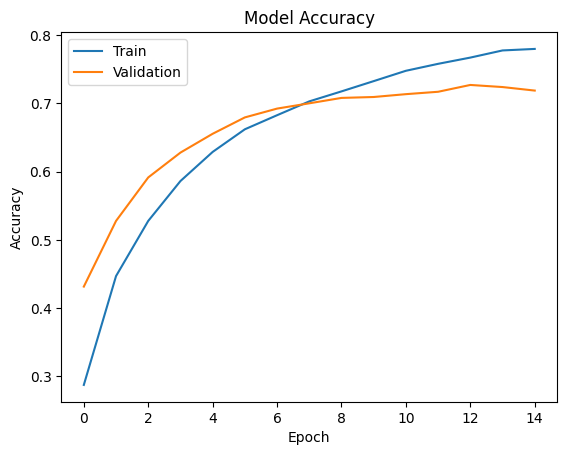

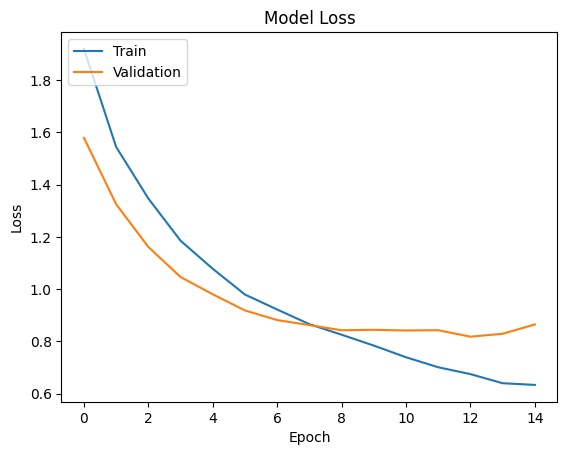

In [11]:
# Visualize the training process using both training and validation results.
import matplotlib.pyplot as plt

history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 3
1. Use the trained model to predict labels for the test set.
2. Compute performance metrics such as accuracy, precision, recall, and F1-score (Explain your
choice).
3. Visualize your confusion matrix.
4. Analyze the results and identify potential improvements.

In [12]:
# Use the trained model to predict labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


**Compute performance**

*   **Accuracy**: To evaluate the overall model performance, check the proportion of the number of correct decision making out of all predictions
*   **Precision**: To assess the model performance if it can identify instances of a particular class correctly
*   **Recall**: To measures the model's ability to identify all instances of a particular class
*   **F1-score**: To balance the trade-off between identifying true positives and minimizing false positives. In this case, we would like to perform well to get true positives, at the same time, minimize misclasification or false positives, so applied this metric






In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy: 0.7898
Precision: 0.7894352455564992
Recall: 0.7898
F1 score: 0.7867476888139272


**Performance Analysis**


*   F1 score is below 0.8, so performance of this model is average.
*   Comapring accuracy and recall, there's no difference, that shows our model is balancly detected 10 classes.



Text(95.72222222222221, 0.5, 'True')

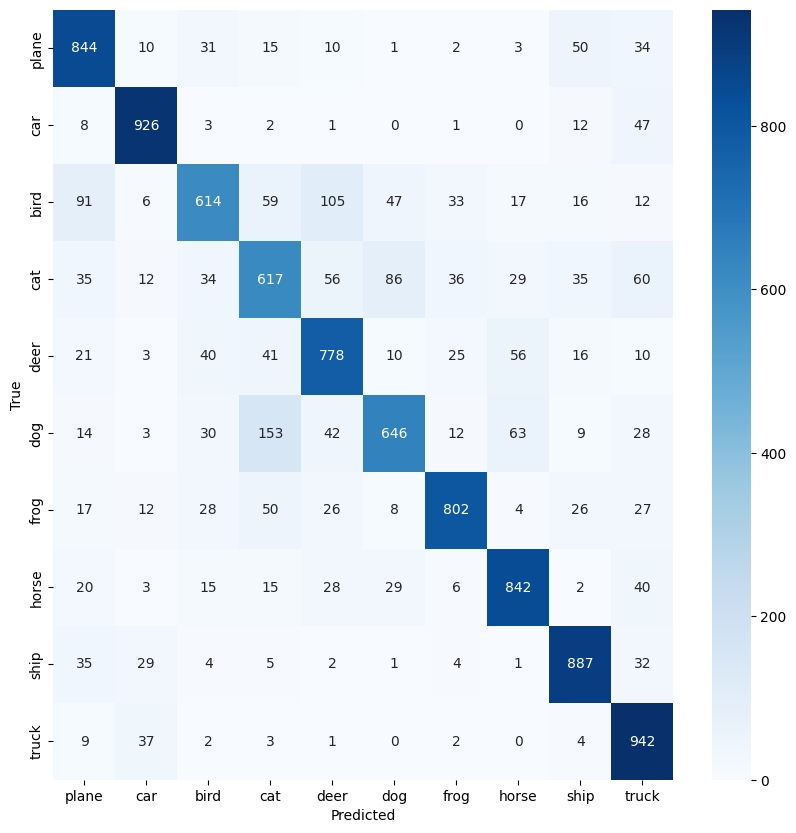

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')

**Confusion matrix analysis**


*   This chart shows that our model struggle to differenciate from cat to dog.
  *    Identify which information our model used to classify
    *    Create image heat map
*   Animals except frog were poor performance



**Grad-CAM to see how the our model works**

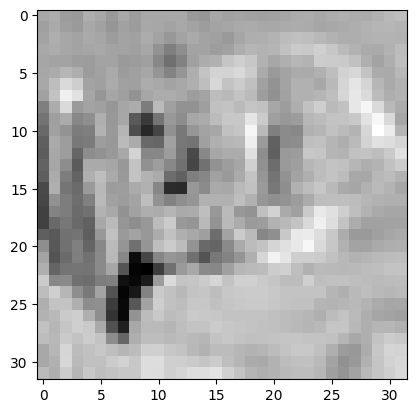

(1, 32, 32, 1)


In [15]:
import matplotlib.pyplot as plt

image = cv2.imread('/content/temp_cat.jpg', 0)
image = cv2.bitwise_not(image)          # ATTENTION
image = cv2.resize(image, (32, 32))

# checking how it looks
plt.imshow(image, cmap="gray")
plt.show()

image = tf.expand_dims(image, axis=-1)     # from 84 x 84 to 84 x 84 x 1
image = tf.divide(image, 255)              # normalize
image = tf.reshape(image, [1, 32, 32, 1])  # reshape to add batch dimension

print(image.shape) # (1, 84, 84, 1)

In [16]:
preds = model.predict(image)
i = np.argmax(preds[0])
i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


9

In [17]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])



        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)

            loss = predictions[:, tf.argmax(predictions[0])]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [27]:
output = model(tf.keras.Input((32, 32, 1)))
depth = output.shape

In [28]:
icam = GradCAM(model, 9, 'dense')
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

image = cv2.imread('/content/temp_cat.jpg')
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 32, 32, 1))
  warnings.warn(msg)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m135428898355408\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 32, 32, 1), dtype=float32)\n  • training=None\n  • mask=None'